In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


View.ipynb viewing functions

In [37]:
import matplotlib.pyplot as plt

def image_normalization(arr):
    return (arr - arr.min())/(arr.max()-arr.min())

def disable_ax_ticks(ax):
    ax.set_xticks([])
    ax.set_xticks([], minor=True)
    ax.set_yticks([])
    ax.set_yticks([], minor=True)

def show_mnist_examples(x, y):
    fig = plt.figure(constrained_layout=True,figsize=(12,9), dpi=100)
    gs = fig.add_gridspec(3,4)
    main_ax = fig.add_subplot(gs[:3,:3])
    fig.suptitle(y)
    #main_ax.imshow(np.moveaxis(x, 0, -1))# .imshow(x)
    main_ax.imshow(image_normalization(np.moveaxis(x, 0, -1)))
    disable_ax_ticks(main_ax)

    for j in range(3):
      c_ax = fig.add_subplot(gs[j,-1])
      subimage = x.copy()
      subimage[:j] = 0
      subimage[j+1:] = 0
      subimage[j] = subimage[j]-subimage[j].min()
      c_ax.imshow(image_normalization(np.moveaxis(subimage, 0, -1)))
      disable_ax_ticks(c_ax)
    plt.show()

Loading dataset

In [38]:
import numpy as np
train_X = np.load("/content/drive/MyDrive/MLCoursework/train_x.npy", allow_pickle=True)
train_y = np.load("/content/drive/MyDrive/MLCoursework/train_y.npy", allow_pickle=True)
validate_X = np.load("/content/drive/MyDrive/MLCoursework/valid_x.npy", allow_pickle=True)
validate_y = np.load("/content/drive/MyDrive/MLCoursework/valid_y.npy", allow_pickle=True)
test_x = np.load("/content/drive/MyDrive/MLCoursework/test_x.npy", allow_pickle=True)
test_y = np.load("/content/drive/MyDrive/MLCoursework/test_y.npy", allow_pickle=True)

Constants


In [39]:
num_classes = 20
input_shape = (3, 28,28)

Importing ML libraries

In [40]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow

Preprocess image

In [41]:
# Normalize image
train_X = image_normalization(train_X)
validate_X = image_normalization(validate_X)

# Convert to channel last
train_X = np.moveaxis(train_X, 1, -1)
validate_X = np.moveaxis(validate_X, 1, -1)

# One-hot encode target feature
train_y = keras.utils.to_categorical(train_y, num_classes)
validate_y = keras.utils.to_categorical(validate_y, num_classes)

Building model

In [42]:
model = keras.Sequential(
    [
        keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 576)              

Compiling and trainig

In [43]:
batch_size = 125
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(train_X, train_y, batch_size=batch_size, epochs=epochs, validation_data=(validate_X, validate_y))

Epoch 1/10
360/360 [==============================] - 43s 117ms/step - loss: 2.3905 - accuracy: 0.1884 - val_loss: 2.0668 - val_accuracy: 0.2751
Epoch 2/10
360/360 [==============================] - 41s 114ms/step - loss: 1.9045 - accuracy: 0.3312 - val_loss: 1.7886 - val_accuracy: 0.3848
Epoch 3/10
360/360 [==============================] - 41s 114ms/step - loss: 1.6368 - accuracy: 0.4340 - val_loss: 1.5473 - val_accuracy: 0.4719
Epoch 4/10
360/360 [==============================] - 41s 114ms/step - loss: 1.4058 - accuracy: 0.5235 - val_loss: 1.3687 - val_accuracy: 0.5445
Epoch 5/10
360/360 [==============================] - 41s 114ms/step - loss: 1.1890 - accuracy: 0.6056 - val_loss: 1.2201 - val_accuracy: 0.6004
Epoch 6/10
360/360 [==============================] - 41s 113ms/step - loss: 1.0298 - accuracy: 0.6656 - val_loss: 1.0822 - val_accuracy: 0.6534
Epoch 7/10
360/360 [==============================] - 41s 113ms/step - loss: 0.8778 - accuracy: 0.7204 - val_loss: 0.9572 - val_ac

Plotting model loss

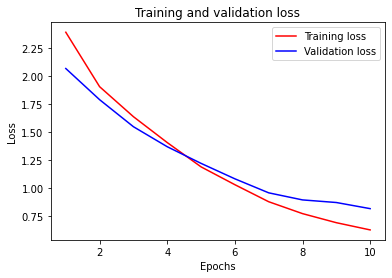

In [44]:
import matplotlib.pyplot as plt

# Gets training history 
history_dict = history.history

#Retrieves values
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Sets x tick values 
epochs = range(1, len(loss_values) + 1)

#Plots data
plt.plot(epochs, loss_values, 'r', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 

#labels

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plotting model loss

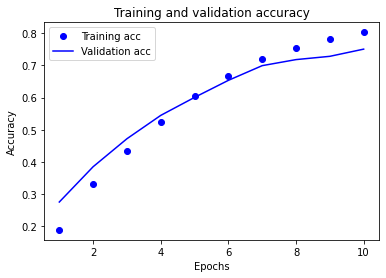

In [45]:
plt.clf()
# Retrieves values
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Plots data
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

#labels
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [48]:
from sklearn.metrics import classification_report
import time 

t0 = time.clock()
# Changes to channel last
test_x1 = np.moveaxis(test_x, 1, -1)

# Calculates prediction probabilities
test_pred = model.predict(test_x1)
# Converts probabilities to category 
test_class_pred = np.argmax(test_pred,axis=1)

# Print classification report 
print(classification_report(test_y, test_class_pred))

# time taken
t1 = time.clock() - 0
print("CPU seconds: ", t1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       395
           1       0.95      0.94      0.94       423
           2       0.90      0.91      0.90       454
           3       0.93      0.89      0.91       504
           4       0.80      0.89      0.84       447
           5       0.82      0.83      0.83       544
           6       0.85      0.77      0.81       497
           7       0.79      0.74      0.77       466
           8       0.80      0.77      0.78       527
           9       0.70      0.75      0.72       534
          10       0.71      0.65      0.68       531
          11       0.75      0.61      0.67       544
          12       0.63      0.69      0.66       536
          13       0.65      0.61      0.63       506
          14       0.59      0.65      0.62       519
          15       0.68      0.63      0.66       507
          16       0.69      0.59      0.64       477
          17       0.69    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
